In [36]:
import sympy as sp
import numpy as np
import keras
X=np.loadtxt('/home/djc6w/S20-team4-project/Project Stuff/train.csv', delimiter = ',')
X=X.astype('float32')
Y=np.loadtxt('/home/djc6w/S20-team4-project/Project Stuff/test.csv', delimiter = ',')
Y=Y.astype('float32')

In [37]:
print(X.shape)
print(Y.shape)

(10111, 81)
(10111, 81)


In [38]:
x_train = np.zeros((X.shape[0],9,9,1))
for i in range(X.shape[0]):
    x_train[i,:,:,0] = X[i].reshape(9,9)
y_train = Y

In [39]:
display(x_train.shape)
display(y_train.shape)

(10111, 9, 9, 1)

(10111, 81)

In [40]:
display(sp.Matrix(x_train[8,:,:,0]))
display(sp.Matrix(y_train[8].reshape(9,9)))
x_train.shape

Matrix([
[              0.0,               0.0,               0.0,               0.0,               0.0, 0.100000001490116, 0.100000001490116, 0.100000001490116,               0.0],
[0.100000001490116, 0.100000001490116,               0.0,               0.0,               0.0, 0.100000001490116,               1.0, 0.100000001490116,               0.0],
[              1.0, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116,               0.0],
[0.100000001490116, 0.100000001490116, 0.100000001490116,               1.0, 0.100000001490116,               0.0,               0.0,               0.0,               0.0],
[              0.0,               0.0, 0.100000001490116, 0.100000001490116, 0.200000002980232, 0.200000002980232, 0.200000002980232, 0.100000001490116,               0.0],
[              0.0, 0.100000001490116, 0.100000001490116, 0.100000001490116,               1.0,               1.0,            

Matrix([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0],
[0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.9, 0.1, 0.0],
[0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0],
[0.1, 0.1, 0.1, 0.9, 0.1, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.0],
[0.0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.1, 0.0],
[0.0, 0.1, 0.9, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1],
[0.1, 0.2, 0.3, 0.2, 0.1, 0.1, 0.1, 0.2, 0.9],
[0.1, 0.9, 0.2, 0.9, 0.1, 0.1, 0.9, 0.2, 0.1]])

(10111, 9, 9, 1)

In [41]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(18, kernel_size=(6,6),
                              activation = 'relu',
                              data_format='channels_last',
                              input_shape=[x_train.shape[1],
                                          x_train.shape[2],
                                          x_train.shape[3]]))
model.add(keras.layers.Conv2D(3,(3,3),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(162,activation='relu'))
model.add(keras.layers.Dense(81, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 4, 4, 18)          666       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 3)           489       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 162)               2106      
_________________________________________________________________
dense_4 (Dense)              (None, 81)                13203     
Total params: 16,464
Trainable params: 16,464
Non-trainable params: 0
_________________________________________________________________


In [42]:
display(model.weights[0][0])

<tf.Tensor: shape=(6, 1, 18), dtype=float32, numpy=
array([[[-0.05379795,  0.07688874, -0.02941133,  0.03739996,
         -0.01069814, -0.08271077,  0.04945828, -0.07500412,
         -0.05819233, -0.02888676, -0.07718435, -0.0889694 ,
         -0.05565473,  0.07046762,  0.04375997, -0.04732209,
         -0.0718351 ,  0.01322337]],

       [[-0.07742987, -0.05732381,  0.0934242 ,  0.08306821,
         -0.0115746 ,  0.06519118, -0.02877689,  0.04853548,
         -0.05214837,  0.01980269,  0.08178321,  0.02679513,
         -0.08451402, -0.07449098,  0.04819615,  0.04801923,
          0.07651311, -0.03538126]],

       [[ 0.05794334, -0.01126309, -0.08367263,  0.02599125,
          0.01346047,  0.02661307,  0.0684755 , -0.07480595,
         -0.00429099,  0.04170536, -0.0756094 , -0.05307904,
          0.04509616, -0.02679042,  0.01245096,  0.06374218,
         -0.06876217,  0.05149241]],

       [[-0.05012336, -0.02743379, -0.05566826,  0.09078981,
          0.04149723,  0.05952623,  0.049

In [43]:
model.load_weights('/home/djc6w/S20-team4-project/Project Stuff/model.h5')

In [44]:
display(model.weights[0][0])

<tf.Tensor: shape=(6, 1, 18), dtype=float32, numpy=
array([[[ 1.6972598e-01,  4.6518001e-01,  5.9983045e-01,  2.2380008e-01,
         -5.3592557e-01,  9.0033673e-02, -5.2945480e-02,  5.2319515e-01,
         -3.1863919e-01, -2.4596849e-03, -4.0892074e-01,  4.9101058e-01,
         -1.8786458e+00,  1.6817827e-02,  2.7433115e-03,  8.0239034e-01,
          1.9740653e-01,  1.1309144e-02]],

       [[ 2.1067220e-01, -9.9863991e-02, -5.4350132e-01, -3.6389685e-01,
         -3.5099411e+00,  1.9736630e-01,  1.1770159e-01,  9.5811307e-02,
         -3.2783854e-01, -4.2383385e-01, -2.6463878e-01,  3.3036193e-01,
         -3.2155209e+00, -5.4569550e-02, -1.6167404e-02, -5.9319623e-02,
          2.2888835e-01, -1.5885971e-01]],

       [[-2.6679039e-01,  5.3471434e-01,  1.8459475e-01,  1.2161206e-01,
         -1.0143650e+00, -7.8326158e-02,  3.6125716e-02,  2.8161871e-01,
         -2.8232658e-01, -4.0808178e-02, -1.7233568e-01, -1.4434052e-01,
         -7.5966157e-02,  1.7788728e-01,  5.9277308e-03, 

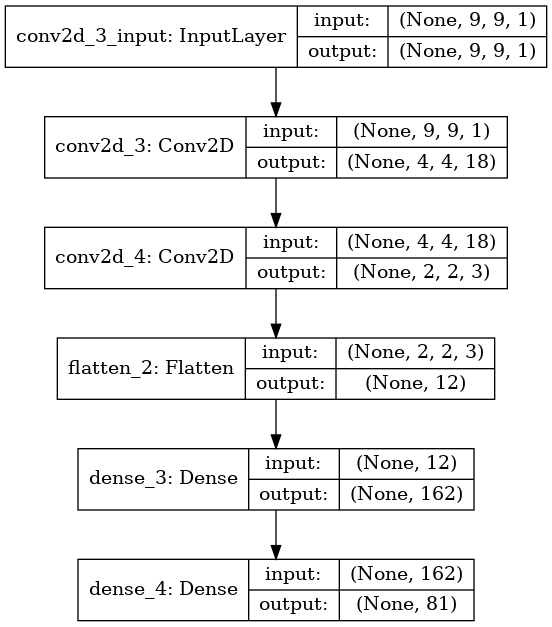

In [45]:
from keras.utils.vis_utils import plot_model
# Visualization - wish we could see the recurrent weights!
plot_model(model,to_file='encdec.png',show_shapes=True,expand_nested=True)

In [46]:
batch_size = 4
epochs = 300
history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1)

Epoch 1/300
10111/10111 [==============================] - 5s 467us/step - loss: 0.5079 - accuracy: 0.3378
Epoch 2/300
10111/10111 [==============================] - 4s 443us/step - loss: 0.4555 - accuracy: 0.3420
Epoch 3/300
10111/10111 [==============================] - 5s 446us/step - loss: 0.4435 - accuracy: 0.3431
Epoch 4/300
10111/10111 [==============================] - 5s 451us/step - loss: 0.4372 - accuracy: 0.3436
Epoch 5/300
10111/10111 [==============================] - 4s 438us/step - loss: 0.4328 - accuracy: 0.3439
Epoch 6/300
10111/10111 [==============================] - 5s 447us/step - loss: 0.4294 - accuracy: 0.3442
Epoch 7/300
10111/10111 [==============================] - 4s 440us/step - loss: 0.4264 - accuracy: 0.3443
Epoch 8/300
10111/10111 [==============================] - 4s 439us/step - loss: 0.4239 - accuracy: 0.3445
Epoch 9/300
10111/10111 [==============================] - 4s 437us/step - loss: 0.4218 - accuracy: 0.3447
Epoch 10/300
10111/10111 [===========

KeyboardInterrupt: 

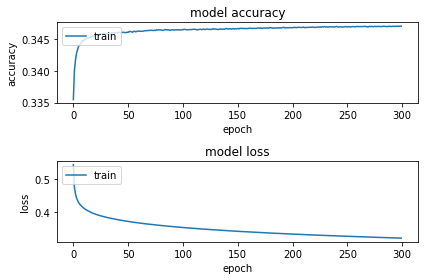

In [47]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')

plt.tight_layout()
plt.show()

In [48]:
score = model.evaluate(x_train, Y, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

10111/10111 [==============================] - 0s 47us/step
Test loss:  0.37794565427917576
Test accuracy:  0.34506720304489136


In [75]:
preds = model.predict(x_train[:,:,:,:]).astype("float32")
preds = preds.round(decimals=1)
display(sp.Matrix(x_train[2,:,:,0]))
display(sp.Matrix(preds[2].reshape(9,9)))
display(sp.Matrix(y_train[2].reshape(9,9)))

Matrix([
[              0.0,               0.0,               0.0,               0.0,               0.0, 0.100000001490116, 0.100000001490116, 0.100000001490116,               0.0],
[0.100000001490116, 0.100000001490116,               0.0,               0.0,               0.0, 0.100000001490116,               1.0, 0.100000001490116,               0.0],
[              1.0, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116,               0.0],
[              1.0,               1.0,               1.0,               1.0, 0.100000001490116,               0.0,               0.0,               0.0,               0.0],
[              1.0,               1.0,               1.0,               1.0, 0.200000002980232, 0.200000002980232, 0.200000002980232, 0.100000001490116,               0.0],
[              1.0,               1.0,               1.0,               1.0,               1.0,               1.0,            

Matrix([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.1],
[0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.2, 0.1],
[0.6, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.0],
[0.1, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.0, 0.0],
[0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.4, 0.0, 0.0],
[0.1, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.0],
[0.1, 0.2, 0.2, 0.0, 0.1, 0.2, 0.2, 0.1, 0.2],
[0.3, 0.2, 0.1, 0.1, 0.1, 0.2, 0.3, 0.2, 0.7],
[0.4, 0.4, 0.1, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1]])

Matrix([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0],
[0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.9, 0.1, 0.0],
[0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0],
[0.1, 0.1, 0.1, 0.9, 0.1, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.0],
[0.0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.1, 0.0],
[0.0, 0.1, 0.9, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1],
[0.1, 0.2, 0.3, 0.2, 0.1, 0.1, 0.1, 0.2, 0.9],
[0.1, 0.9, 0.2, 0.9, 0.1, 0.1, 0.9, 0.2, 0.1]])

In [192]:
def min_net(pred, env):
    temp = 1.0
    print(pred.shape)
    for x in range(pred.shape[0]):
        print("in x:", x)
        for y in range(pred.shape[1]):
            print("in y :", y)
            if(pred[x,y]!=0.0):
                if((float(pred[x,y])<float(temp))) & (float(env[x,y])==float(1.0)):
                    return x,y

def coordinate_net(x,y):
    #print(x)
    #print(y)
    a = chr(x+97)
    #print(a)
    b = chr(y+49)
    #print(a+b)
    return (a+b)
                
    


#this,that = min_net(sp.Matrix(preds[2].reshape(9,9)), sp.Matrix(x_train[2,:,:,0]))
#print(this,that)
#coordinate_net(this,that)

In [ ]:
import numpy as np
import random
import csv
import re
import time
import random
from string import ascii_lowercase



def setupgrid(gridsize, start, numberofmines):
    # Initialize empty grid
    emptygrid = [['0' for i in range(gridsize)] for i in range(gridsize)]
    
    mines = getmines(emptygrid, start, numberofmines)
    
    # Label mine spaces
    for i, j in mines:
        emptygrid[i][j] = 'X'

    grid = getnumbers(emptygrid)

    return (grid, mines)

# Output the grid
def showgrid(grid):
    gridsize = len(grid)

    horizontal = '   ' + (4 * gridsize * '-') + '-'

    # Print top column letters
    toplabel = '     '

    for i in ascii_lowercase[:gridsize]:
        toplabel = toplabel + i + '   '

    print(toplabel + '\n' + horizontal)

    # Print left row numbers
    for idx, i in enumerate(grid):
        row = '{0:2} |'.format(idx + 1)

        for j in i:
            row = str(row) + ' ' + str(j) + ' |'

        print(row + '\n' + horizontal)

    print('')


def getrandomcell(grid):
    gridsize = len(grid)

    a = random.randint(0, gridsize - 1)
    b = random.randint(0, gridsize - 1)

    return (a, b)

# Used to initialize neighboring cells / safe cells
def getneighbors(grid, rowno, colno):
    gridsize = len(grid)
    neighbors = []

    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            elif -1 < (rowno + i) < gridsize and -1 < (colno + j) < gridsize:
                neighbors.append((rowno + i, colno + j))

    return neighbors

# Once the neighbors are initialized, this fills in random remaining spaces,
# excluding the starting cell and neighbors, up to the requested number of mines
def getmines(grid, start, numberofmines):
    mines = []
    neighbors = getneighbors(grid, *start) # initialize unavailable spaces

    for i in range(numberofmines):
        cell = getrandomcell(grid)
        while cell == start or cell in mines or cell in neighbors:
            cell = getrandomcell(grid)
        mines.append(cell)

    return mines


def getnumbers(grid):
    for rowno, row in enumerate(grid):
        for colno, cell in enumerate(row):
            if cell != 'X':
                # Gets the values of the neighbors
                values = [grid[r][c] for r, c in getneighbors(grid,
                                                              rowno, colno)]

                # Counts how many are mines
                grid[rowno][colno] = str(values.count('X'))

    return grid


def showcells(grid, currgrid, rowno, colno):
    # Exit function if the cell was already shown
    if currgrid[rowno][colno] != ' ':
        return

    # Show current cell
    currgrid[rowno][colno] = grid[rowno][colno]

    # Get the neighbors if the cell is empty
    if grid[rowno][colno] == '0':
        for r, c in getneighbors(grid, rowno, colno):
            # Repeat function for each neighbor that doesn't have a flag
            if currgrid[r][c] != 'F':
                showcells(grid, currgrid, r, c)


def playagain():
    choice = input('Play again? (y/n): ')

    return choice.lower() == 'y'


def parseinput(inputstring, gridsize, helpmessage):
    cell = ()
    flag = False
    message = "Invalid cell. " + helpmessage

    # Reformat input for more flexible acceptance
    pattern = r'([a-{}])([0-9]+)(f?)'.format(ascii_lowercase[gridsize - 1])
    validinput = re.match(pattern, inputstring)

    # Enter input into the associated grid space
    if inputstring == 'help':
        message = helpmessage

    elif validinput:
        rowno = int(validinput.group(2)) - 1
        colno = ascii_lowercase.index(validinput.group(1))
        flag = bool(validinput.group(3))

        if -1 < rowno < gridsize:
            cell = (rowno, colno)
            message = ''

    return {'cell': cell, 'flag': flag, 'message': message}

def getmove(grid, currgrid):
    if not grid:
        rand = random.randrange(10)
        rand2 = str(chr(random.randrange(0,9)+97))
        ret = rand2 + str(rand)
        return ret
    for x in range(0,9):
        for y in range(0,9):
            if (currgrid[x][y] == ' ' and grid[x][y] != 'X'):
                ret = str(chr(y+97)) + str(x+1)
                return ret
        
def pushtest(grid):
    newgrid = np.array(csvprep(grid))
    with open ('test.csv', mode='a') as grid_file:
        file_writer = csv.writer(grid_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        file_writer.writerow(newgrid.flatten())
    grid_file.close()

def pushtrain(grid):
    newgrid = np.array(csvprep(grid))
    with open ('train.csv', mode='a') as grid_file:
        file_writer = csv.writer(grid_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        file_writer.writerow(newgrid.flatten())
    grid_file.close()

    
##############################
#Change encoding values here
##############################
    
    
def csvprep(grid):
    newgrid = [row[:]for row in grid]
    for x in range(0,9):
        for y in range(0,9):
            if grid[x][y] == ' ':
                newgrid[x][y] = 1
            if grid[x][y] == '0':
                newgrid[x][y] = 0.0
            if grid[x][y] == '1':
                newgrid[x][y] = 0.1
            if grid[x][y] == '2':
                newgrid[x][y] = 0.2
            if grid[x][y] == '3':
                newgrid[x][y] = 0.3
            if grid[x][y] == '4':
                newgrid[x][y] = 0.4
            if grid[x][y] == '5':
                newgrid[x][y] = 0.5
            if grid[x][y] == '6':
                newgrid[x][y] = 0.6
            if grid[x][y] == '7':
                newgrid[x][y] = 0.7
            if grid[x][y] == '8':
                newgrid[x][y] = 0.8
            if grid[x][y] == 'X':
                newgrid[x][y] = 0.9
    return newgrid
     
def promptread():
    fstream=open('response.txt','r')
    thing = fstream.read()
    fstream.close()
    return thing

#
def feedbackload(flagcheck):
    fstream=open('response.txt','w')
    fstream.write(flagcheck)
    fstream.close()

def playgame():
    gridsize = 9
    numberofmines = 10
    flagcheck = True

    currgrid = [[' ' for i in range(gridsize)] for i in range(gridsize)]

    grid = []
    flags = []
    starttime = 0

    helpmessage = ("Type the column followed by the row (eg. a5). "
                   "To put or remove a flag, add 'f' to the cell (eg. a5f).")

    #showgrid(currgrid)
    print(helpmessage + " Type 'help' to show this message again.\n")
    while True:
        minesleft = numberofmines - len(flags)
                
        
        newgrid = np.array(csvprep(currgrid))
        i = np.zeros((1,9,9,1))
        i[0,:,:,0] = newgrid
        x,y = min_net(model.predict(i).reshape(9,9),newgrid)
        prompt = coordinate_net(x,y)
        print(prompt)
        #print(prompt)
        if not prompt:
            playgame()
        #prompt = input('Enter the cell ({} mines left): '.format(minesleft))
        #prompt=promptread()
        result = parseinput(prompt, gridsize, helpmessage + '\n')

        message = result['message']
        cell = result['cell']

        if cell:
            #print('\n\n')
            rowno, colno = cell
            currcell = currgrid[rowno][colno]
            flag = result['flag']

            if not grid:
                grid, mines = setupgrid(gridsize, cell, numberofmines)
            if not starttime:
                starttime = time.time()

            if flag:
                # Add a flag if the cell is empty
                if currcell == ' ':
                    currgrid[rowno][colno] = 'F'
                    flags.append(cell)
                # Remove the flag if there is one
                elif currcell == 'F':
                    currgrid[rowno][colno] = ' '
                    flags.remove(cell)
                else:
                    message = 'Cannot put a flag there'

            # If there is a flag there, show a message
            elif cell in flags:
                message = 'There is a flag there'

            elif grid[rowno][colno] == 'X':
                print('Game Over\n')
                showgrid(grid)
                flagcheck=False
                if playagain():
                    playgame()
                return

            elif currcell == ' ':
                showcells(grid, currgrid, rowno, colno)

            else:
                message = "That cell is already shown"
                
            
            #if set(flags) == set(mines):
            #    minutes, seconds = divmod(int(time.time() - starttime), 60)
            #    print(
            #        'You Win. '
            #        'It took you {} minutes and {} seconds.\n'.format(minutes,
            #                                                          seconds))
            #    showgrid(grid)
            #    if playagain():
            #        playgame()
            #    return
        showgrid(currgrid)       
        
        print(message)
        

playgame()

Type the column followed by the row (eg. a5). To put or remove a flag, add 'f' to the cell (eg. a5f). Type 'help' to show this message again.

(9, 9)
in x: 0
in y : 0
a1
     a   b   c   d   e   f   g   h   i   
   -------------------------------------
 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |   |
   -------------------------------------
 2 | 1 | 1 | 1 | 0 | 0 | 1 | 1 | 2 | 1 |
   -------------------------------------
 3 |   |   | 1 | 0 | 0 | 1 |   | 1 | 0 |
   -------------------------------------
 4 |   |   | 1 | 0 | 0 | 1 | 1 | 1 | 0 |
   -------------------------------------
 5 |   |   | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
   -------------------------------------
 6 |   |   | 2 | 2 | 2 | 1 | 0 | 0 | 0 |
   -------------------------------------
 7 |   |   |   |   |   | 2 | 2 | 1 | 1 |
   -------------------------------------
 8 |   |   |   |   |   |   |   |   |   |
   -------------------------------------
 9 |   |   |   |   |   |   |   |   |   |
   -------------------------------------


(9, 9)
